# 3 Visualize geophysical responses from 3D geological models.

Here, we use PyNoddy (https://github.com/cgre-aachen/pynoddy) to visualize the gravity and magnetic response of 3D geological models. Noddy will calculate the gravity and magnetic response for each geological model.

In [1]:
%matplotlib inline


In [38]:
# Inport modules
import sys, os
sys.path.append('../..')

import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')

import pynoddy
import matplotlib.pyplot as plt
import numpy as np
import pynoddy.history
import pynoddy.output
import os

In [44]:
def cal_noddy(history_name, output):
    his = pynoddy.history.NoddyHistory(history_name)
    his.determine_model_stratigraphy()
    his.change_cube_size(50)
    # Save to (local) file to compute and visualise model
    his.write_history(history_name)
    
    noddy_path = "./noddyapp/noddy"
    # Change the file permissions to make it executable
    os.chmod(noddy_path, 0o755)
    pynoddy.compute_model(history_name, output,noddy_path=noddy_path)
    
    # load and visualise model
    h_out = pynoddy.output.NoddyOutput(output)
    
    # his.determine_model_stratigraphy()
    h_out.plot_section('x', 
                   layer_labels = his.model_stratigraphy, 
                   colorbar_orientation = 'horizontal', 
                   colorbar=False,
                   title = 'x_section',
    #                   savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
                   cmap = 'YlOrRd')
    h_out.plot_section('z', layer_labels = his.model_stratigraphy, 
                   colorbar_orientation = 'horizontal', title = 'z_section', cmap = 'YlOrRd', 
    #                   savefig=True, fig_filename = 'fold_thrust_EW_section.eps',
                   ve=1.5)
    
    # Compute geophysics
    pynoddy.compute_model(history_name, output, sim_type = 'GEOPHYSICS',noddy_path=noddy_path)
    geophys = pynoddy.output.NoddyGeophysics(output)
    
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    # imshow(geophys.grv_data, cmap = 'jet')
    # define contour levels
    levels = np.arange(geophys.grv_data.min(),geophys.grv_data.max(),1)
    cf = ax.contourf(geophys.grv_data, levels, cmap = 'gray', vmin = geophys.grv_data.min(), vmax = geophys.grv_data.max())
    cbar = plt.colorbar(cf, orientation = 'horizontal')
    # print levels
    ax.set_title('gravity')
    
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    # imshow(geophys.grv_data, cmap = 'jet')
    # define contour levels
    levels = np.arange(geophys.mag_data.min(),geophys.mag_data.max(),100)
    cf = ax.contourf(geophys.mag_data, levels, cmap = 'gray', vmin = geophys.mag_data.min(), vmax = geophys.mag_data.max())
    cbar = plt.colorbar(cf, orientation = 'horizontal')
    # print levels
    ax.set_title('magnetic')

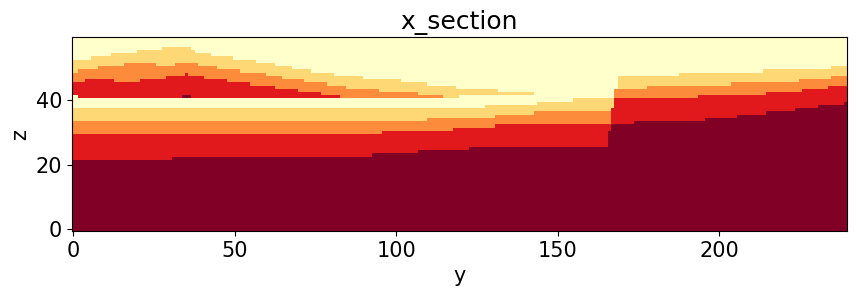

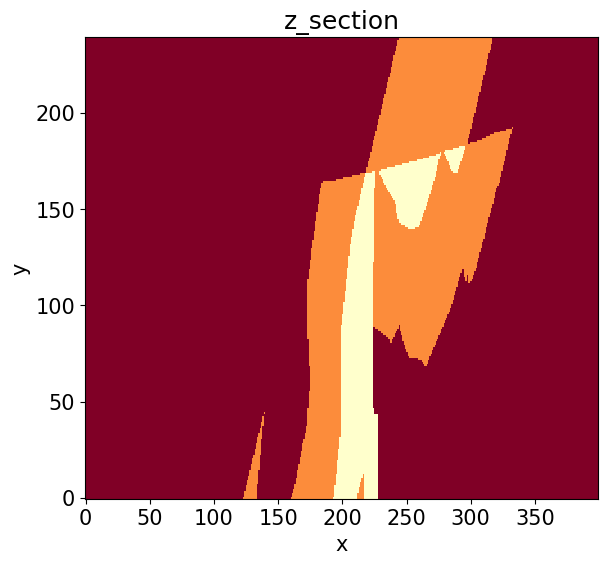

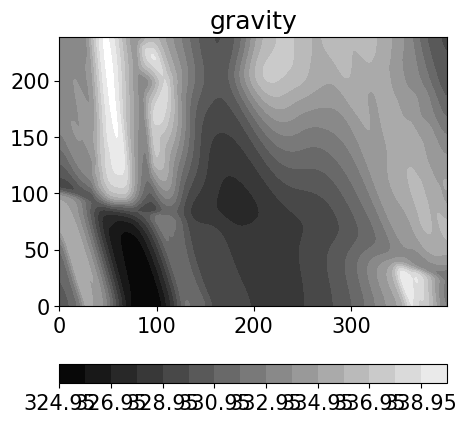

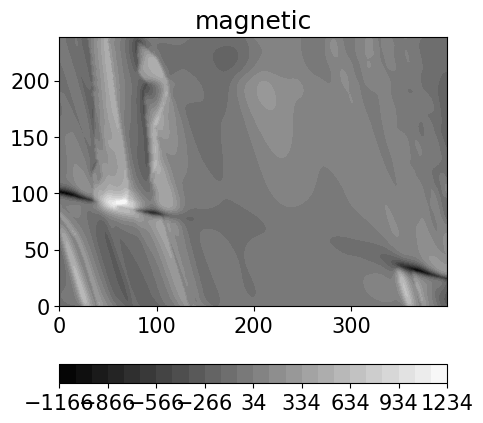

In [45]:
# Define History file name
history_name = "fold_thrust.his"
# Define output name
out_put = "fold_thrust_out"
# Visulise geolocial model and geophysics response
cal_noddy(history_name, out_put)